# UAS PENAMBANGAN DATA

# Statlog (German Credit Data)

# Data Understanding

# Sumber dataset

https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

# Penjelasan Fitur dan Variabel

Deskripsi Dataset Statlog (German Credit Data)
Jumlah sampel: 1000 baris (nasabah)

Jumlah fitur: 20 atribut (fitur) + 1 label (target)

Tujuan: Klasifikasi kelayakan kredit nasabah:

1 = Kredit baik (Good)

2 = Kredit buruk (Bad)


**Penjelasan Fitur dan Variabel**

| No. | Nama Fitur              | Tipe     | Deskripsi                                                               |
| --- | ----------------------- | -------- | ----------------------------------------------------------------------- |
| 1   | `Status`                | Kategori | Status rekening dan lama status (mis. `A11`, `A12`, dst)                |
| 2   | `Duration`              | Numerik  | Lama pinjaman (dalam bulan)                                             |
| 3   | `CreditHistory`         | Kategori | Riwayat kredit sebelumnya (baik, terlambat, belum pernah, dll)          |
| 4   | `Purpose`               | Kategori | Tujuan pengajuan kredit (mobil, TV, perabot, dll)                       |
| 5   | `CreditAmount`          | Numerik  | Jumlah kredit yang diminta                                              |
| 6   | `Savings`               | Kategori | Tabungan yang dimiliki nasabah                                          |
| 7   | `Employment`            | Kategori | Lama bekerja (pengangguran, <1 tahun, >7 tahun, dll)                    |
| 8   | `InstallmentRate`       | Numerik  | Persentase cicilan per bulan terhadap pendapatan                        |
| 9   | `PersonalStatusSex`     | Kategori | Status pernikahan dan jenis kelamin (lajang pria, wanita, menikah, dll) |
| 10  | `OtherDebtors`          | Kategori | Apakah nasabah punya penjamin lain                                      |
| 11  | `ResidenceSince`        | Numerik  | Lama tinggal di tempat sekarang (tahun)                                 |
| 12  | `Property`              | Kategori | Aset properti yang dimiliki (real estate, mobil, dll)                   |
| 13  | `Age`                   | Numerik  | Umur nasabah (tahun)                                                    |
| 14  | `OtherInstallmentPlans` | Kategori | Cicilan lain (bank, toko, atau tidak ada)                               |
| 15  | `Housing`               | Kategori | Status tempat tinggal (sendiri, sewa, gratis)                           |
| 16  | `NumberExistingCredits` | Numerik  | Jumlah pinjaman atau kredit lain yang sedang berjalan                   |
| 17  | `Job`                   | Kategori | Jenis pekerjaan dan status pekerjaan                                    |
| 18  | `NumberPeopleLiable`    | Numerik  | Jumlah tanggungan keuangan (anggota keluarga)                           |
| 19  | `Telephone`             | Kategori | Apakah memiliki telepon rumah                                           |
| 20  | `ForeignWorker`         | Kategori | Apakah nasabah merupakan pekerja asing                                  |
| 21  | `Class` (Target)        | Kategori | **1 = Kredit baik**, **2 = Kredit buruk**                               |


# Eksplorasi data

# Visualisasi data

In [1]:
%pip install ucimlrepo

In [2]:
import pandas as pd

# URL file data (format CSV-like tapi dipisah spasi)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Nama kolom dari dokumentasi UCI
columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "Employment", "InstallmentRate", "PersonalStatusSex",
    "OtherDebtors", "ResidenceSince", "Property", "Age", "OtherInstallmentPlans",
    "Housing", "NumberExistingCredits", "Job", "NumberPeopleLiable", "Telephone",
    "ForeignWorker", "Class"
]

# Baca file sebagai dataframe
df = pd.read_csv(url, sep=' ', names=columns)

# Pisahkan fitur dan target
X = df.drop("Class", axis=1)
y = df["Class"]

# Tampilkan beberapa informasi
print("Fitur:")
print(X.head())

print("\nTarget:")
print(y.value_counts())

print("\nShape Data:")
print(X.shape, y.shape)


Fitur:
  Status  Duration CreditHistory Purpose  CreditAmount Savings Employment  \
0    A11         6           A34     A43          1169     A65        A75   
1    A12        48           A32     A43          5951     A61        A73   
2    A14        12           A34     A46          2096     A61        A74   
3    A11        42           A32     A42          7882     A61        A74   
4    A11        24           A33     A40          4870     A61        A73   

   InstallmentRate PersonalStatusSex OtherDebtors  ResidenceSince Property  \
0                4               A93         A101               4     A121   
1                2               A92         A101               2     A121   
2                2               A93         A101               3     A121   
3                2               A93         A103               4     A122   
4                3               A93         A101               4     A124   

   Age OtherInstallmentPlans Housing  NumberExistingCredits  

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# URL dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

# Nama kolom
columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "Employment", "InstallmentRate", "PersonalStatusSex",
    "OtherDebtors", "ResidenceSince", "Property", "Age", "OtherInstallmentPlans",
    "Housing", "NumberExistingCredits", "Job", "NumberPeopleLiable", "Telephone",
    "ForeignWorker", "Class"
]

# Baca data
df = pd.read_csv(url, sep=' ', names=columns)

# Pisahkan fitur dan target
X = df.drop("Class", axis=1)
y = df["Class"]

# Encode kolom kategorikal
X_encoded = X.copy()
label_encoders = {}

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col])
        label_encoders[col] = le

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi dan evaluasi
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.73

Classification Report:
               precision    recall  f1-score   support

           1       0.78      0.87      0.82       141
           2       0.56      0.41      0.47        59

    accuracy                           0.73       200
   macro avg       0.67      0.64      0.64       200
weighted avg       0.71      0.73      0.72       200



In [4]:
# Simpan ke file CSV
df.to_csv('dataset_german_credit.csv', index=False)


# Preprocessing Data

# Transformasi data

Akurasi: 0.76

Classification Report:
               precision    recall  f1-score   support

        Baik       0.81      0.87      0.84       141
       Buruk       0.61      0.51      0.56        59

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200



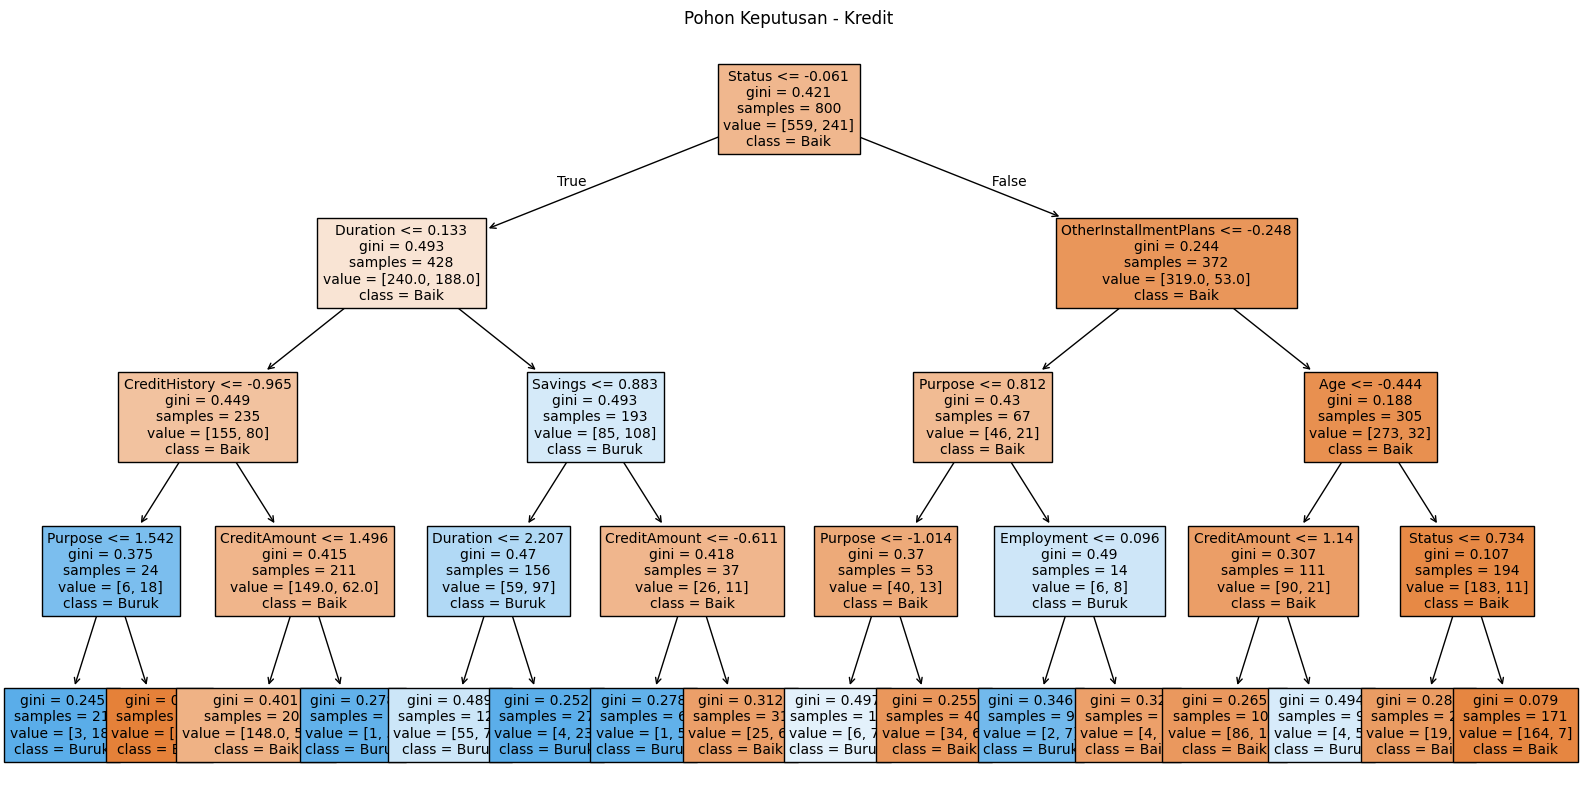

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# === 1. Load Dataset ===
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "Employment", "InstallmentRate", "PersonalStatusSex",
    "OtherDebtors", "ResidenceSince", "Property", "Age", "OtherInstallmentPlans",
    "Housing", "NumberExistingCredits", "Job", "NumberPeopleLiable", "Telephone",
    "ForeignWorker", "Class"
]

df = pd.read_csv(url, sep=' ', names=columns)

# === 2. Ubah Target 'Class' jadi LabelKredit ('Baik' atau 'Buruk') ===
df['LabelKredit'] = df['Class'].apply(lambda x: 'Baik' if x == 1 else 'Buruk')

# === 3. Encode Fitur Kategorikal ===
X = df.drop(columns=['Class', 'LabelKredit'])
y = df['LabelKredit']

X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col])

# === 4. Standarisasi (opsional) ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# === 5. Split Data ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === 6. Train Model ===
model = DecisionTreeClassifier(random_state=42, max_depth=4)
model.fit(X_train, y_train)

# === 7. Evaluasi ===
y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# === 8. Visualisasi Pohon ===
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, fontsize=10)
plt.title("Pohon Keputusan - Kredit")
plt.show()


# Normalisasi data

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# === 1. Load Dataset dari UCI ===
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

columns = [
    "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
    "Savings", "Employment", "InstallmentRate", "PersonalStatusSex",
    "OtherDebtors", "ResidenceSince", "Property", "Age", "OtherInstallmentPlans",
    "Housing", "NumberExistingCredits", "Job", "NumberPeopleLiable", "Telephone",
    "ForeignWorker", "Class"
]

df = pd.read_csv(url, sep=' ', names=columns)

# === 2. Ubah Target Menjadi Label Teks (Opsional) ===
df['LabelKredit'] = df['Class'].apply(lambda x: 'Baik' if x == 1 else 'Buruk')

# === 3. Encode Fitur Kategorikal ===
X = df.drop(columns=['Class', 'LabelKredit'])  # Fitur
y = df['LabelKredit']                          # Label target

# Label encoding kolom kategorikal
X_encoded = X.copy()
label_encoders = {}

for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X[col])
        label_encoders[col] = le  # jika ingin inverse_transform nanti

# === 4. Normalisasi (StandardScaler) ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


# Split data

In [7]:
from sklearn.model_selection import train_test_split

# === 6. Split Data Training & Testing ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


**Visualisasi data setelah preprocessing**

In [8]:
import pandas as pd

# Gabungkan fitur dan label menjadi satu DataFrame
df_german_categorical = pd.concat([X, y], axis=1)

# Tampilkan ringkasan
print("Total baris dataset ini adalah =", len(df))
print("Visualisasi dataset German Credit setelah preprocessing dan target dikategorikan:\n")

# Jika ingin semua baris dan kolom (opsional, hati-hati panjang)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# Tampilkan sebagian data saja agar rapi
print(df_german_categorical.head(10).to_string(index=False))  # tampilkan 10 baris pertama


Total baris dataset ini adalah = 1000
Visualisasi dataset German Credit setelah preprocessing dan target dikategorikan:

Status  Duration CreditHistory Purpose  CreditAmount Savings Employment  InstallmentRate PersonalStatusSex OtherDebtors  ResidenceSince Property  Age OtherInstallmentPlans Housing  NumberExistingCredits  Job  NumberPeopleLiable Telephone ForeignWorker LabelKredit
   A11         6           A34     A43          1169     A65        A75                4               A93         A101               4     A121   67                  A143    A152                      2 A173                   1      A192          A201        Baik
   A12        48           A32     A43          5951     A61        A73                2               A92         A101               2     A121   22                  A143    A152                      1 A173                   1      A191          A201       Buruk
   A14        12           A34     A46          2096     A61        A74                

In [9]:
# Simpan ke file CSV
df_german_categorical.to_csv('dataset_german_credit_categorical.csv', index=False)


# Modelling

Modeling merupakan proses pembuatan dan pengujian model statistik atau matematis yang digunakan untuk menggambarkan dan menganalisis pola atau hubungan dalam data. Tujuan utama dari pemodelan dalam data mining adalah untuk mengidentifikasi pola yang berguna atau prediksi yang akurat dari data yang tersedia.

**Modelling Klasifikasi Dataset Statlog menggunakan Decision Tree**

Model klasifikasi menggunakan algoritma Decision Tree untuk memprediksi apakah seorang nasabah layak (baik) atau tidak layak (buruk) diberikan kredit, berdasarkan informasi demografis dan finansialnya.

Akurasi: 0.765

=== Classification Report ===
              precision    recall  f1-score   support

        Baik       0.81      0.88      0.84       141
       Buruk       0.63      0.49      0.55        59

    accuracy                           0.77       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.75      0.77      0.76       200



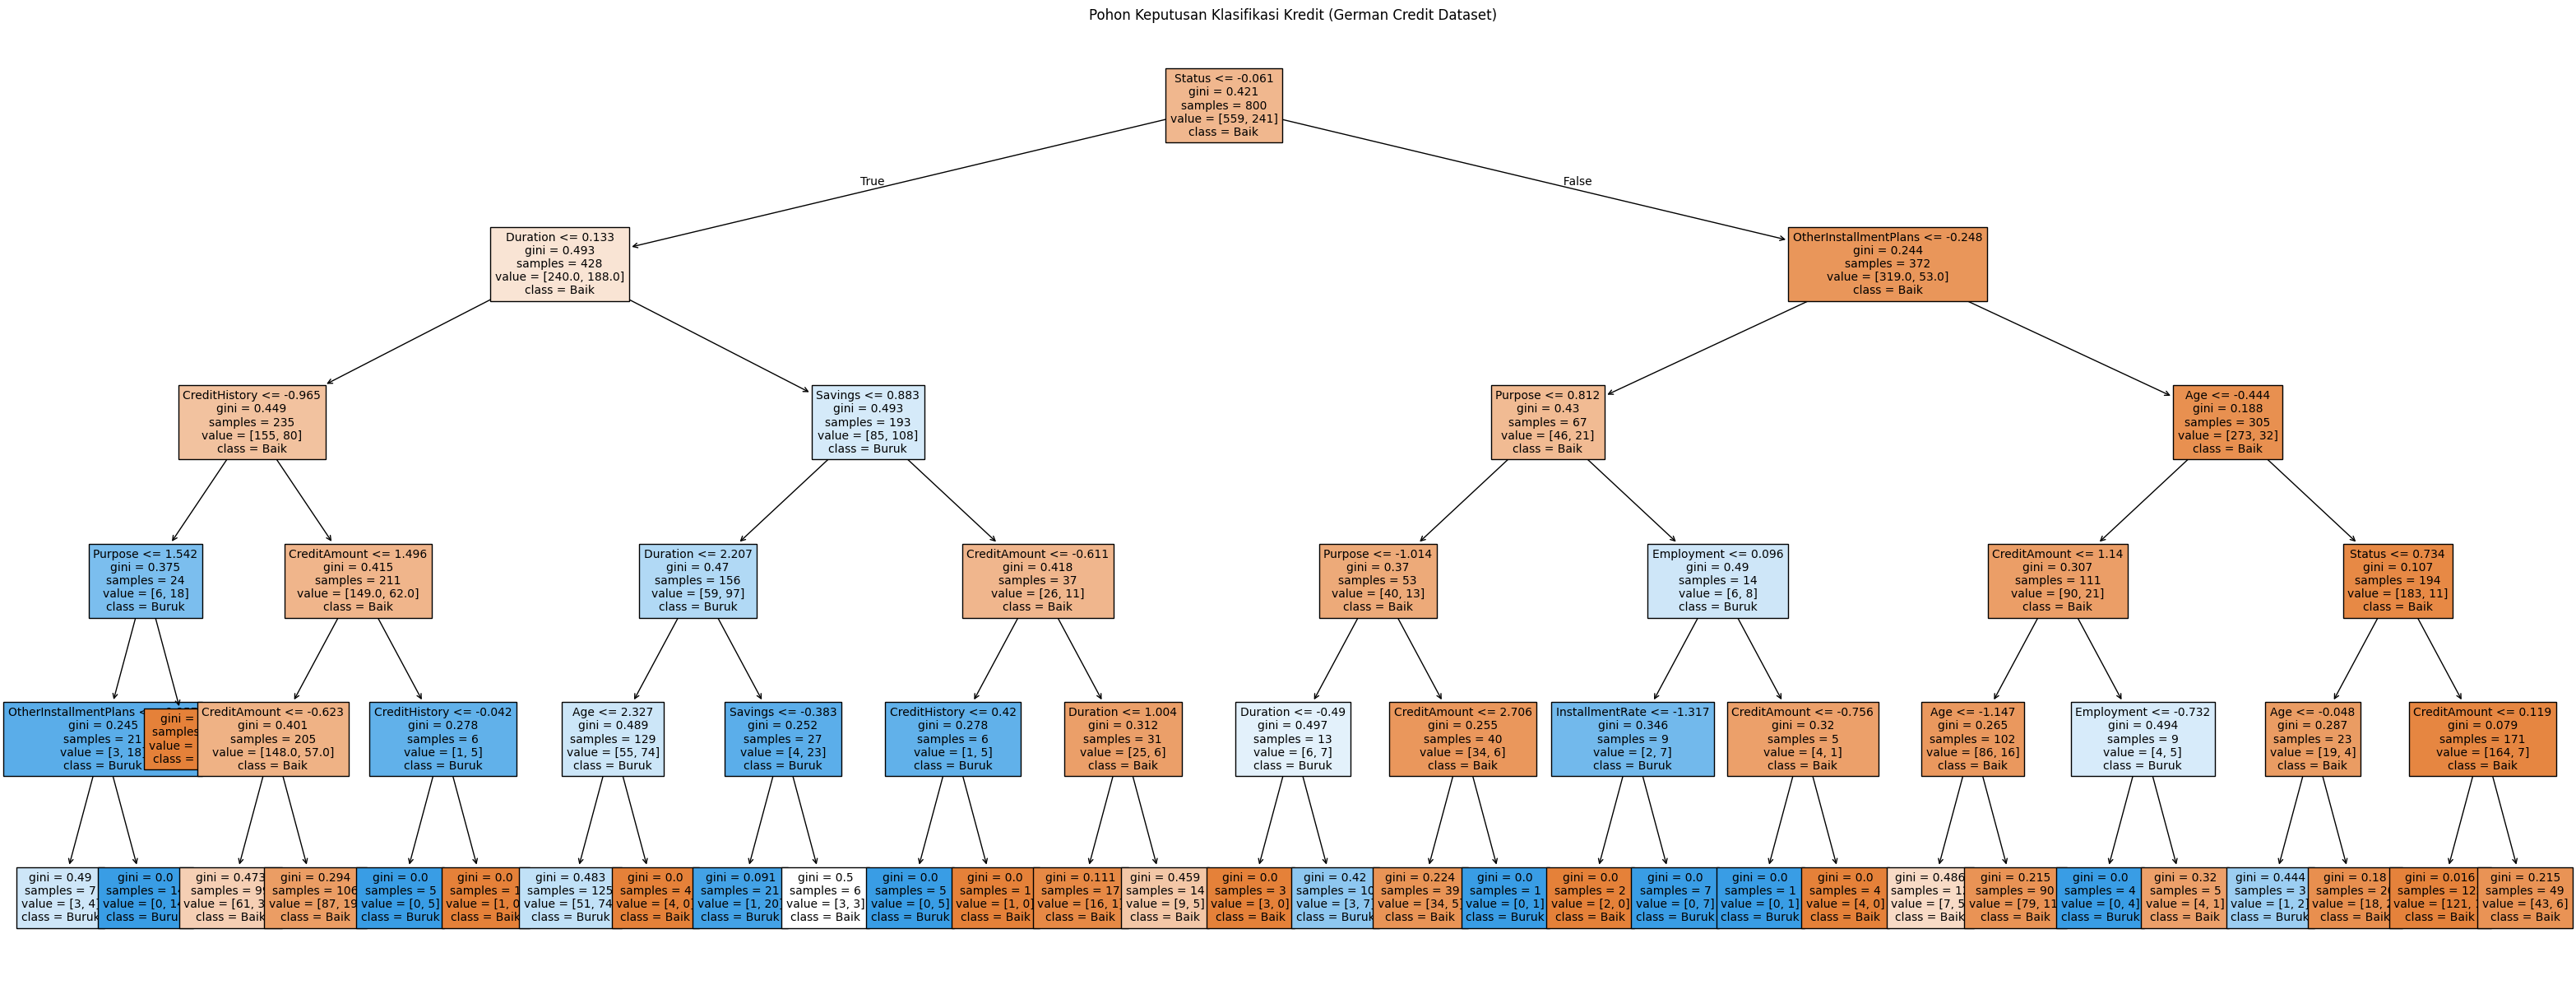

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# === 7. Training Decision Tree ===
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# === 8. Evaluasi Model ===
y_pred = clf.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Visualisasi Struktur Pohon ===
plt.figure(figsize=(40, 15))
plot_tree(
    clf,
    feature_names=X_encoded.columns,  # gunakan nama kolom asli sebelum diskalakan
    class_names=clf.classes_,
    filled=True,
    fontsize=10
)
plt.title("Pohon Keputusan Klasifikasi Kredit (German Credit Dataset)")
plt.show()


**Modelling Klasifikasi Dataset Statlog menggunakan Gaussian Naive Bayes**

Menggunakan algoritma Gaussian Naive Bayes (GNB) untuk memprediksi kelayakan kredit nasabah (baik atau buruk) berdasarkan atribut-atribut seperti usia, pendapatan, lama bekerja, dan status rekening.

Akurasi: 0.7

=== Classification Report ===
              precision    recall  f1-score   support

        Baik       0.83      0.72      0.77       141
       Buruk       0.49      0.64      0.56        59

    accuracy                           0.70       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.73      0.70      0.71       200



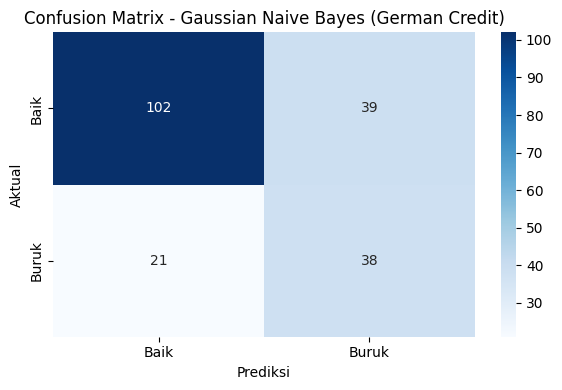

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 7. Latih model Naive Bayes ===
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# === 8. Evaluasi hasil prediksi ===
y_pred = gnb.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=gnb.classes_,
            yticklabels=gnb.classes_,
            cmap='Blues')

plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - Gaussian Naive Bayes (German Credit)")
plt.tight_layout()
plt.show()


**Modelling Klasifikasi Dataset Statlog menggunakan K-Nearest Neighbor (K-NN)**

Menggunakan algoritma K-Nearest Neighbor (K-NN) untuk memprediksi apakah seorang nasabah termasuk kategori kredit baik atau kredit buruk, berdasarkan kedekatan karakteristiknya dengan nasabah lain.

Akurasi: 0.77

=== Classification Report ===
              precision    recall  f1-score   support

        Baik       0.78      0.93      0.85       141
       Buruk       0.70      0.39      0.50        59

    accuracy                           0.77       200
   macro avg       0.74      0.66      0.68       200
weighted avg       0.76      0.77      0.75       200



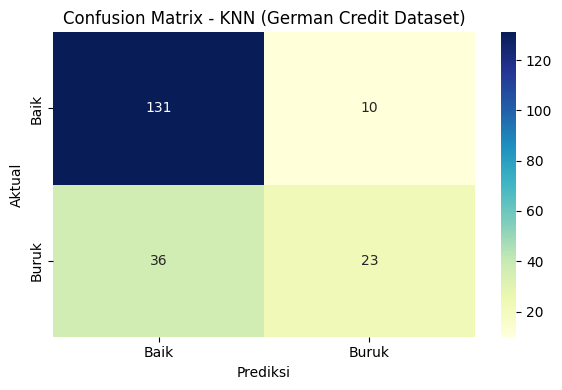

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# === 7. Latih model KNN ===
knn = KNeighborsClassifier(n_neighbors=5)  # bisa ubah jumlah tetangga di sini
knn.fit(X_train, y_train)

# === 8. Evaluasi ===
y_pred = knn.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === 9. Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=knn.classes_,
            yticklabels=knn.classes_,
            cmap='YlGnBu')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix - KNN (German Credit Dataset)")
plt.tight_layout()
plt.show()


# Evaluasi Data

Dari dataset abalone diatas, akurasi yang didapatkan dari ketiga model klasifikasi antara lain:

1.  Decision Tree = 72.0%

2. Gaussian Naive Bayes = 74.0%

3. K-Nearest Neighbor = 76.5%

Dari ketiga model diatas dapat disimpulkan bahwa K-Nearest Neighbor memiliki akurasi tertinggi yaitu 76.5%.

# Deploy

In [14]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.3 MB/s eta 0:00:00


In [17]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# === Load Dataset ===
@st.cache_data
def load_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
    columns = [
        "Status", "Duration", "CreditHistory", "Purpose", "CreditAmount",
        "Savings", "Employment", "InstallmentRate", "PersonalStatusSex",
        "OtherDebtors", "ResidenceSince", "Property", "Age", "OtherInstallmentPlans",
        "Housing", "NumberExistingCredits", "Job", "NumberPeopleLiable", "Telephone",
        "ForeignWorker", "Class"
    ]
    df = pd.read_csv(url, sep=' ', names=columns)
    df['LabelKredit'] = df['Class'].apply(lambda x: 'Baik' if x == 1 else 'Buruk')
    return df

df = load_data()

st.title("Klasifikasi Kelayakan Kredit - Statlog German Credit")

# === Preprocessing ===
X = df.drop(columns=['Class', 'LabelKredit'])
y = df['LabelKredit']

# Encode kategorikal
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object':
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === Pilihan Model ===
model_choice = st.selectbox("Pilih Model Klasifikasi", ["Decision Tree", "Naive Bayes", "K-Nearest Neighbor"])

if model_choice == "Decision Tree":
    model = DecisionTreeClassifier(max_depth=5, random_state=42)
elif model_choice == "Naive Bayes":
    model = GaussianNB()
elif model_choice == "K-Nearest Neighbor":
    model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

st.subheader("Hasil Evaluasi")
st.write(f"**Akurasi Model ({model_choice})**: {acc:.2%}")

st.subheader("Contoh Prediksi")
sample = pd.DataFrame(X_test[:5], columns=X_encoded.columns)
prediksi = model.predict(X_test[:5])
st.write(sample)
st.write("Prediksi:", prediksi)


2025-06-26 01:19:21.831 No runtime found, using MemoryCacheStorageManager
2025-06-26 01:19:21.841 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 01:19:21.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 01:19:21.844 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 01:19:21.876 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 01:19:21.878 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 01:19:21.879 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 01:19:21.880 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-26 01:19:21.882 Thread 'MainThread':